In [1]:
import sys
!{sys.executable} -m pip install bs4

  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
import urllib
from bs4 import BeautifulSoup # Berperan untuk membersihkan dari semua tag.

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page, 'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p'))) # Hanya ambil yang tag HTML-nya 'p', alias hanya ambil paragraf
    return soup.title.text, text

In [3]:
url = "https://en.wikipedia.org/wiki/Artificial_intelligence"
for title in extract_title_text(url): # Judul dan text yang diekstrak, tidak hanya judul.
    print(title)

Artificial intelligence - Wikipedia

 In computer science,  artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans.  Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".[1]
 As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.[2] A quip in Tesler's Theorem says "AI is whatever hasn't been done yet."[3] For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.[4] Modern machine capabilities generally classified as AI include successfully understanding human speech,[5] competing at the highest level in strategic game systems 

In [6]:
url2 = "https://edition.cnn.com/2019/06/26/business/ikea-affordable-housing/index.html"

for title in extract_title_text(url2):
    print(title) # ini kontennya ditulis bukan dalam tag 'p', tapi 'div'. Makanya, keluarnya cuma sedikit! Dasar CNN.

Ikea's affordable housing could arrive in Britain soon - CNN
By Julia Horowitz, CNN Business  Updated 1557 GMT (2357 HKT) June 26, 2019  Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds. London (CNN Business)Ikea conquered the world with inexpensive furniture. Now it's turning its attention to affordable homes in Britain. 


In [7]:
url3 = "https://edition.cnn.com/2019/08/07/tech/samsung-note10/index.html"

for title in extract_title_text(url3):
    print(title)

Samsung's Note10 finally bids farewell to the headphone jack - CNN
By Samantha Kelly, CNN Business  Updated 2156 GMT (0556 HKT) August 7, 2019  Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds. New York (CNN Business)When Apple removed the headphone jack from its iPhone 7 in 2016, Samsung pushed out a series of ads mocking the decision. Some executives even threw shade at its biggest competitor during a demo of wired headphones at a big product launch. 


Mengambil data dari banyak URL? Bikin list atau tuple dari banyak URL.

Data rolling diambil dari seed, di sini seed URL.

Text Visualisation?

In [12]:
!{sys.executable} -m pip install pyLDAvis

  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [2]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import requests
import nltk

In [3]:
text = open("Mission_Impossible_6_Review.txt", "r").read()

Remove Punctuation and Special Characters

In [5]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text) # Mensubstitusikan, yang bukan (tanda ^) spasi, a-z, A-Z, angka 0-9,
# akan diganti dengan string kosong.

In [6]:
print("My Previous Text")
print("----------------")
print(text)
print("----------------")
print("My New Text")
print("----------------")
print(my_new_text)

My Previous Text
----------------
Before its release, Mission: Impossible Fallout has been known for two things: the fact that it's the first direct sequel in the series and THAT injury to Tom Cruise.Let's get the injury out of the way first. The shot is in the movie and it will make you wince because you know the context, but otherwise you don't really notice any difference as the stunt in question is just the latest in a long line of deathdefying activities featuring Cruise.What makes more of an impact on the sixth movie in the series is its connection to the previous movie, Rogue Nation, with the return of the villainous Solomon Lane (played creepily again by Sean Harris) and his nefarious Syndicate, who are again threatening the world.With the addition of Ethan Hunt's former wife Julia (Michelle Monaghan) from the third movie, Fallout is immediately given more depth than previous outings and the stakes feel higher, with Ethan Hunt (Cruise) haunted by his past mistakes. However, a d

In [7]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text))

# Stop words removal
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# Lemmatization
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)
print(normalized)

Before release Mission Impossible Fallout known two thing fact first direct sequel series THAT injury Tom CruiseLets get injury way first The shot movie make wince know context otherwise dont really notice difference stunt question latest long line deathdefying activity featuring CruiseWhat make impact sixth movie series connection previous movie Rogue Nation return villainous Solomon Lane played creepily Sean Harris nefarious Syndicate threatening worldWith addition Ethan Hunts former wife Julia Michelle Monaghan third movie Fallout immediately given depth previous outing stake feel higher Ethan Hunt Cruise haunted past mistake However downside movie intent feeling epic slightly overlong clocking almost two half hoursBut time breathtaking final third kick gear youll forgive slight niggle delivers best spectacle weve seen year At time even IMAX doesnt feel big enough contain itPutting aside direct connection previous movie series first returning director Christopher McQuarrie pretty mu

Create n grams where n is the number of words

In [8]:
from nltk import ngrams
n = 3
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [9]:
print(total_grams[:10])

[('Before', 'release', 'Mission'), ('release', 'Mission', 'Impossible'), ('Mission', 'Impossible', 'Fallout'), ('Impossible', 'Fallout', 'known'), ('Fallout', 'known', 'two'), ('known', 'two', 'thing'), ('two', 'thing', 'fact'), ('thing', 'fact', 'first'), ('fact', 'first', 'direct'), ('first', 'direct', 'sequel')]


Create the wordcloud visualisation on the processed data

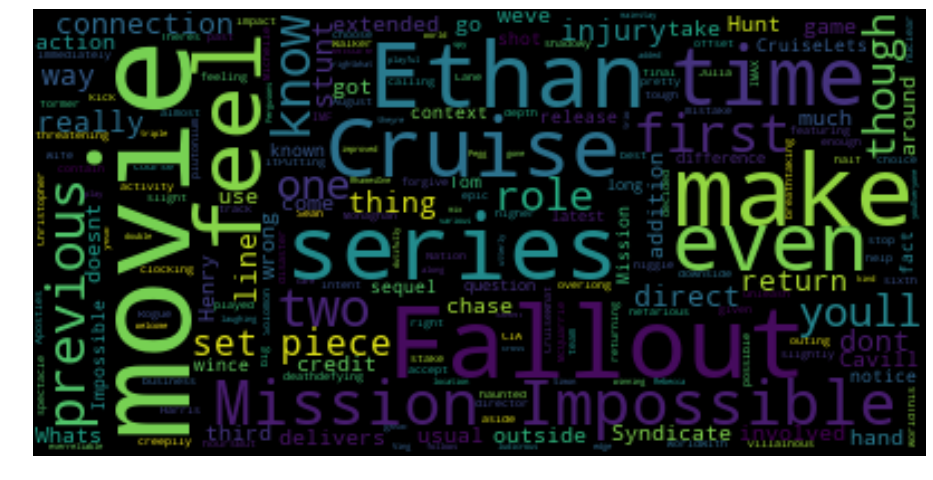

In [10]:
from wordcloud import WordCloud

# Untuk meng-generate word cloud.
# Ukuran font menggambarkan frekuensi atau tingkat kepentingan dari suatu kata.
wordcloud = WordCloud(max_font_size = 60).generate(normalized)
# Configuring the figure
plt.figure(figsize = (16, 12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Kalau tidak dihapus stop wordsnya, mungkin yang divisualisasi dalam wordcloud sampai besar-besar itu stop wordsnya.
# Jadinya, preprocessing dengan mengeliminasi stop words itu perlu.

In [11]:
# Mirip FreqDist()

count = {}

# Split untuk memecah string menjadi beberapa bagian. By default, dipisahkan berdasarkan spasi.
# Secara fungsi, normalized.split() mirip word_tokenize.
for w in normalized.split(): 
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

for word, times in count.items():
    if times > 3: # Menampilkan kata-kata yang muncul lebih dari tiga kali.
        print("%s was found %d times." % (word, times)) # Kata-kata ini akan dipakai menjadi suatu topik.

Mission was found 4 times.
Impossible was found 4 times.
Fallout was found 6 times.
series was found 5 times.
get was found 4 times.
movie was found 12 times.
make was found 6 times.
Ethan was found 4 times.
feel was found 5 times.
Cruise was found 4 times.
time was found 4 times.
even was found 4 times.


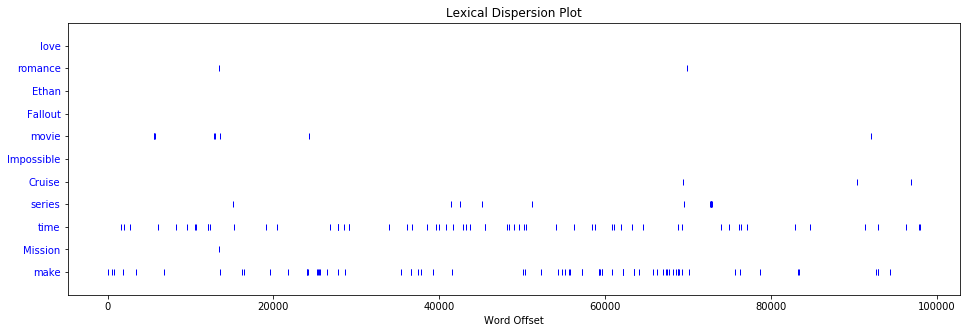

In [12]:
# Corpus adalah kumpulan dokumen. Di sini pake corpus bawaan, terdiri dari 9 buku.
# Mengetahui apakah topik-topik tersebut relevan dengan corpusnya

from nltk.book import text7 as content
plt.figure(figsize = (16, 5))
topics = ['love', 'romance', 'Ethan', 'Fallout', 'movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

# Melihat persebaran kata-kata pada corpus baru dengan dispersion_plot()

<class 'nltk.text.Text'>
<class 'nltk.text.Text'>


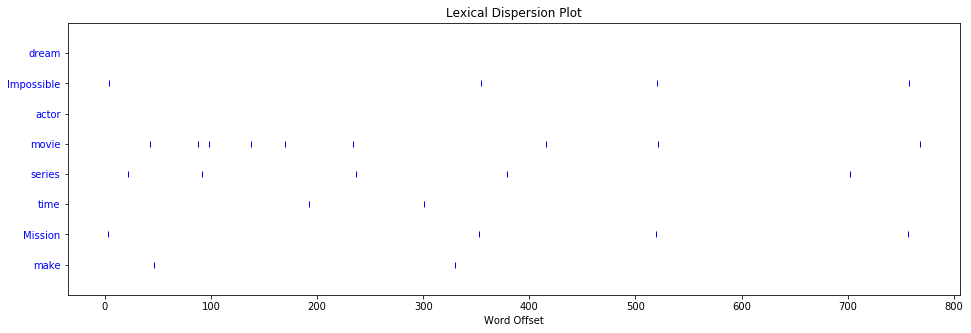

In [13]:
# Ambilnya bukan dari corpus bawaan

from nltk.book import text1 as content

plt.figure(figsize = (16, 5))
topics2 = ['dream', 'Impossible', 'actor', 'movie', 'series', 'time', 'Mission', 'make']
print(type(content))
text = nltk.Text(word_tokens) # Tokenize textnya dulu! Sebelumnya juga import dulu.
print(type(text))
text.dispersion_plot(topics2)

# Evaluasi kualitas hasil ringkasan?
# Corpus dari artikel asli, key words dari summary.

Topic Modelling

In [60]:
# Mendeteksi sub-topik supaya bisa membuat summary yang lebih nyambung

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True)) # Simple preprocess untuk meringkas

In [64]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus
dictionary = corpora.Dictionary(tokenized_sents)
# Dictionary yang berisi kata-kata di dokumen kita, kemudian kita akan memakai bantuan LDA

# Converting list of documents (corpus) into Document Term Matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

print(dictionary)
print(doc_term_matrix)

Dictionary(339 unique tokens: ['before', 'release', 'mission', 'impossible', 'fallout']...)
[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(14, 1)], [(18, 1)], [(9, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(21, 1)], [(12, 1)], [(43, 1)], [(44, 1)], [(21, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [(66, 1)], [(67, 1)], [(21, 1)], [(4, 1)], [(68, 1)], [(69, 1)], [(70, 1)], [(44, 1)], [(71, 1)], [(72, 1)], [(73, 1)], [(74, 1)], [(60, 

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

# Train model, untuk mendeteksi sub-topik di dalam artikel yang kita punya
ldamodel = Lda(doc_term_matrix, num_topics = 2, id2word = dictionary, passes)

In [ ]:
print(ldamodel.print_topics(num_topics = 2, num_words = 20))

# Mirip clustering. Ingin dipecah menjadi dua subtopik, digambarkan dengan kelompok kata-kata yang menggambarkan topik
# tersebut. Inget K-Means!
# Perhatikan tandanya, ada dua topik/cluster. Isi di dalamnya ada subtopik.
# Angka-angka desimal di dalam itu adalah bobot subtopik. Subtopik dengan bobot terbesar itu yang paling menggambarkan topik.
# Bisa dipake buat memeriksa kemiripan antara beberapa dokumen, sambil cek bobotnya.